In [13]:
# Scikit-Learn ≥0.20 is required
import sklearn

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [14]:
import os
datapath = os.path.join("datasets", "lifesat", "")

# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [15]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [17]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


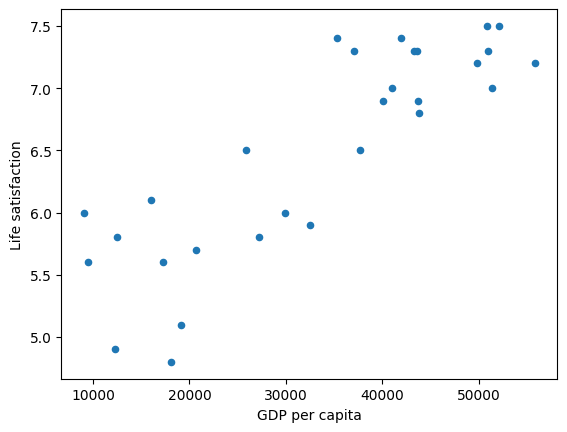

In [18]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [28]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [29]:
model.fit(X, y)

LinearRegression()

In [30]:
X_new = [[35000]]
print(model.predict(X_new))

[[6.57209341]]


In [36]:
def f(x): 
    # b1*x + b0
    return model.coef_[0][0] * x + model.intercept_

In [41]:
model.coef_[0][0]

4.911544589158486e-05

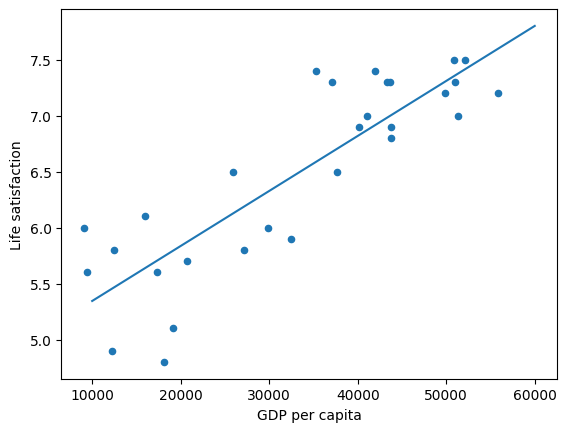

In [37]:
x_ = np.linspace(10000, 60000, 100)
y_ = list(map(f, x_))

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.plot(x_, y_)
plt.show()

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
model2 = RandomForestRegressor()
model2.fit(X, y)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

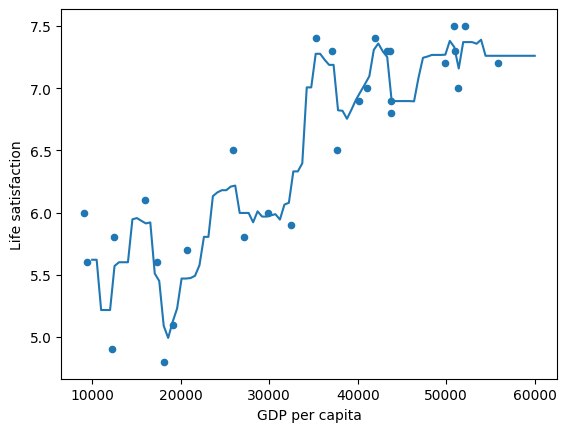

In [49]:
def rf(x): 
    return model2.predict(np.array([[x]]))

x_ = np.linspace(10000, 60000, 100)
y_ = list(map(rf, x_))

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.plot(x_, y_)
plt.show()

In [52]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X, y)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [54]:
X.shape

(150, 4)

In [55]:
y.shape

(150,)

In [57]:
clf.predict(X[:2])

array([0, 0])

In [58]:
clf.predict_proba(X[:2])

array([[9.81813537e-01, 1.81864490e-02, 1.43884301e-08],
       [9.71751811e-01, 2.82481591e-02, 3.00932288e-08]])

In [59]:
clf.predict_proba(X[:2]).sum(axis=1)

array([1., 1.])

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
y_pred = clf.predict(X)

In [63]:
accuracy_score(y, y_pred)

0.9733333333333334

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df = df.dropna()

In [84]:
X = pd.get_dummies(df[['Pclass', 'Age', 'Sex', 'Embarked']]).astype(np.float32)
y = df['Survived']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
model = LogisticRegression().fit(X_train, y_train)

In [89]:
model

LogisticRegression()

In [110]:
y_pred = model.predict_proba(X_test)

(array([ 2.,  1.,  0.,  0.,  6.,  9.,  4.,  2.,  4.,  3.,  4.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  8., 16.]),
 array([0.21665362, 0.25416621, 0.2916788 , 0.32919139, 0.36670398,
        0.40421657, 0.44172916, 0.47924174, 0.51675433, 0.55426692,
        0.59177951, 0.6292921 , 0.66680469, 0.70431728, 0.74182986,
        0.77934245, 0.81685504, 0.85436763, 0.89188022, 0.92939281,
        0.9669054 ]),
 <BarContainer object of 20 artists>)

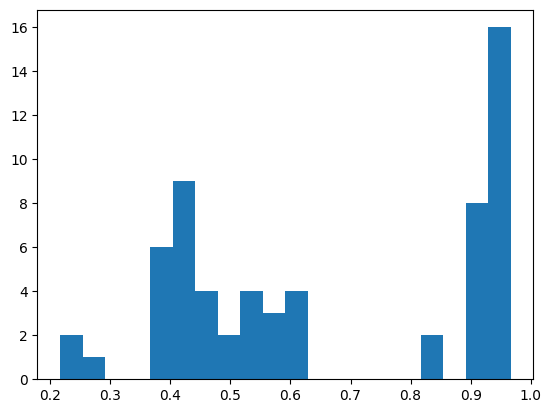

In [96]:
plt.hist(y_pred[:, 1], bins=20)

In [99]:
np.argmax(y_pred[:, 1])

19

In [102]:
X_test.iloc[19]

Pclass         1.0
Age           17.0
Sex_female     1.0
Sex_male       0.0
Embarked_C     1.0
Embarked_Q     0.0
Embarked_S     0.0
Name: 307, dtype: float32

In [103]:
np.argmax(-y_pred[:, 1])

18

In [105]:
X_test.iloc[18]

Pclass         3.0
Age           32.0
Sex_female     0.0
Sex_male       1.0
Embarked_C     0.0
Embarked_Q     0.0
Embarked_S     1.0
Name: 429, dtype: float32

In [112]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [129]:
threshold = 0.4
print(precision_score(y_test, y_pred[:, 1] > threshold))
print(recall_score(y_test, y_pred[:, 1] > threshold))

0.6545454545454545
0.9473684210526315


In [130]:
y_pred[:, 1] > threshold

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True])